In [20]:
import tensorflow as tf
from tensorflow import keras

import os
import tempfile

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import joblib # saving algorithm and preprocessing serialized objects
from sklearn.model_selection import train_test_split # used for data splitting
from sklearn.preprocessing import LabelEncoder # used for preprocessing

%matplotlib inline

In [2]:
# load test dataset: 
df = pd.read_csv('/Users/micahkirkpatrick/Documents/decision_support_tool/model_data/base6.csv', skipinitialspace=False)
x = df.drop(['SerialNumber', 'HurricaneName', 'DeclarationDate', 'IncidentBeginDate', 'IncidentEndDate', 'DisasterCloseOutDate', 'Declared', 'GeoName', 'County', 'State'], axis = 1)
# set input matrix and target column:
y = df['Declared']
# show first rows of data:
x.head()

,FIPS,MaxPrecipitation,WindSwathRadii,CountyOverlap,VALUE_1,VALUE_2,VALUE_3,VALUE_4,VALUE_5,VALUE_7,...,Deciduous_Forest,Evergreen_Forest,Mixed_Forest,Shrub_Scrub,Herbaceuous,Hay_Pasture,Cultivated_Crops,Woody_Wetlands,Emergent_Herbaceuous_Wetlands,Population
0,22001,"4"" to 6""",58,100.000000,2.476679e+07,1.417292e+07,1.105560e+06,0.0,0.0,0.0,...,3099600,29845800,31617900,2769300,2081700,114534900,1062193500,248421600,2347200,62590.0
1,22009,"2"" to 4""",39,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,47990700,52580700,37260000,12894300,12469500,254997900,830644200,758770200,16775100,40980.0
2,22011,"1"" to 2""",58,12.217249,NaN,NaN,NaN,NaN,NaN,NaN,...,8638200,1443164400,53488800,338255100,136060200,226836900,31453200,535906800,5139000,36928.0
3,22013,"1"" to 2""",39,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,109230300,1048653000,23819400,237616200,147206700,22209300,2137500,366525000,2635200,13638.0
4,22015,"0"" to 1""",39,43.920893,NaN,NaN,NaN,NaN,NaN,NaN,...,121778100,799141500,84913200,95726700,58199400,273266100,48853800,433539900,12926700,127634.0


In [3]:
x.count()

FIPS                             2181
MaxPrecipitation                 2181
WindSwathRadii                   2181
CountyOverlap                    2181
VALUE_1                           434
VALUE_2                           434
VALUE_3                           434
VALUE_4                           434
VALUE_5                           434
VALUE_7                           183
Stormsurge_Area                   434
SOCIAL                           2181
INFRASTRUCTURE                   2181
COMCAPITAL                       2181
INSTITUTION                      2181
ENVIRONMENT                      2181
BRIC_SCORE                       2181
Unclassified                     2181
Open_Water                       2181
Perennial_Snow_Ice               2181
Developed__Open_Space            2181
Developed__Low_Intensity         2181
Developed__Medium_Intensity      2181
Developed__High_Intensity        2181
Barren_Land                      2181
Deciduous_Forest                 2181
Evergreen_Fo

In [4]:
x['FIPS'] = x['FIPS'].astype('object')
x['MaxPrecipitation'] = x['MaxPrecipitation'].astype('object')
x['WindSwathRadii'] = x['WindSwathRadii'].astype('object')
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2181 entries, 0 to 2180
Data columns (total 35 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   FIPS                           2181 non-null   object 
 1   MaxPrecipitation               2181 non-null   object 
 2   WindSwathRadii                 2181 non-null   object 
 3   CountyOverlap                  2181 non-null   float64
 4   VALUE_1                        434 non-null    float64
 5   VALUE_2                        434 non-null    float64
 6   VALUE_3                        434 non-null    float64
 7   VALUE_4                        434 non-null    float64
 8   VALUE_5                        434 non-null    float64
 9   VALUE_7                        183 non-null    float64
 10  Stormsurge_Area                434 non-null    float64
 11  SOCIAL                         2181 non-null   float64
 12  INFRASTRUCTURE                 2181 non-null   f

In [5]:
x.describe

<bound method NDFrame.describe of        FIPS MaxPrecipitation WindSwathRadii  CountyOverlap       VALUE_1  \
0     22001         4" to 6"             58     100.000000  2.476679e+07   
1     22009         2" to 4"             39     100.000000           NaN   
2     22011         1" to 2"             58      12.217249           NaN   
3     22013         1" to 2"             39     100.000000           NaN   
4     22015         0" to 1"             39      43.920893           NaN   
...     ...              ...            ...            ...           ...   
2176  12003        6" to 10"             58     100.000000           NaN   
2177  12073        6" to 10"             74       1.611371           NaN   
2178  12053        6" to 10"             58       4.211007  1.985079e+07   
2179  12067         4" to 6"             58     100.000000           NaN   
2180  12023         4" to 6"             58     100.000000           NaN   

           VALUE_2       VALUE_3       VALUE_4  VALUE

In [6]:
y.head()

0    No
1    No
2    No
3    No
4    No
Name: Declared, dtype: object

In [7]:
y.describe

<bound method NDFrame.describe of 0        No
1        No
2        No
3        No
4        No
       ... 
2176    Yes
2177    Yes
2178    Yes
2179    Yes
2180    Yes
Name: Declared, Length: 2181, dtype: object>

In [8]:
y.unique()

array(['No', 'Yes'], dtype=object)

In [9]:
y.describe()

count     2181
unique       2
top         No
freq      1403
Name: Declared, dtype: object

In [10]:
y.unique()

array(['No', 'Yes'], dtype=object)

In [11]:
# set matplotlib colors:
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']


In [12]:
x_encoded_df = {}

for column in ['FIPS',
              'MaxPrecipitation',
              'WindSwathRadii']:
    categorical_convert = LabelEncoder()
    x_encoded_df[column] = categorical_convert.fit_transform(x[column])
    
# convert the categorical target elements:
categorical_convert = LabelEncoder()
y_converted = categorical_convert.fit_transform(y)

In [13]:
x_encoded_df = pd.DataFrame(x_encoded_df)
x_encoded_df.describe()

,FIPS,MaxPrecipitation,WindSwathRadii
count,2181.000000,2181.000000,2181.000000
mean,446.096286,3.485099,0.660248
std,295.874400,1.859610,0.845724
min,0.000000,0.000000,0.000000
25%,181.000000,2.000000,0.000000
50%,439.000000,3.000000,0.000000
75%,692.000000,5.000000,1.000000
max,971.000000,6.000000,3.000000


In [14]:
x_encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2181 entries, 0 to 2180
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   FIPS              2181 non-null   int64
 1   MaxPrecipitation  2181 non-null   int64
 2   WindSwathRadii    2181 non-null   int64
dtypes: int64(3)
memory usage: 51.2 KB


In [15]:
x_df1 = x.iloc[:, 3:]
x_df2 = x_encoded_df
x_df = pd.concat([x_df2, x_df1], axis = 1)
x_df.head(n = 6)

,FIPS,MaxPrecipitation,WindSwathRadii,CountyOverlap,VALUE_1,VALUE_2,VALUE_3,VALUE_4,VALUE_5,VALUE_7,...,Deciduous_Forest,Evergreen_Forest,Mixed_Forest,Shrub_Scrub,Herbaceuous,Hay_Pasture,Cultivated_Crops,Woody_Wetlands,Emergent_Herbaceuous_Wetlands,Population
0,293,5,2,100.000000,2.476679e+07,1.417292e+07,1.105560e+06,0.0,0.0,0.0,...,3099600,29845800,31617900,2769300,2081700,114534900,1062193500,248421600,2347200,62590.0
1,297,3,1,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,47990700,52580700,37260000,12894300,12469500,254997900,830644200,758770200,16775100,40980.0
2,298,1,2,12.217249,NaN,NaN,NaN,NaN,NaN,NaN,...,8638200,1443164400,53488800,338255100,136060200,226836900,31453200,535906800,5139000,36928.0
3,299,1,1,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,109230300,1048653000,23819400,237616200,147206700,22209300,2137500,366525000,2635200,13638.0
4,300,0,1,43.920893,NaN,NaN,NaN,NaN,NaN,NaN,...,121778100,799141500,84913200,95726700,58199400,273266100,48853800,433539900,12926700,127634.0
5,301,0,1,8.106651,NaN,NaN,NaN,NaN,NaN,NaN,...,108793800,532299600,195609600,78824700,72084600,337018500,185595300,365625900,12344400,246581.0


In [16]:
# reference code:
# train_mode = dict(x_train.mode().iloc[0])
# x_train = x_train.fillna(train_mode)

# fill all NaN values w/ 0: 

x_df = x_df.fillna(0)
x_df.head()

,FIPS,MaxPrecipitation,WindSwathRadii,CountyOverlap,VALUE_1,VALUE_2,VALUE_3,VALUE_4,VALUE_5,VALUE_7,...,Deciduous_Forest,Evergreen_Forest,Mixed_Forest,Shrub_Scrub,Herbaceuous,Hay_Pasture,Cultivated_Crops,Woody_Wetlands,Emergent_Herbaceuous_Wetlands,Population
0,293,5,2,100.000000,2.476679e+07,1.417292e+07,1.105560e+06,0.0,0.0,0.0,...,3099600,29845800,31617900,2769300,2081700,114534900,1062193500,248421600,2347200,62590.0
1,297,3,1,100.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,...,47990700,52580700,37260000,12894300,12469500,254997900,830644200,758770200,16775100,40980.0
2,298,1,2,12.217249,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,...,8638200,1443164400,53488800,338255100,136060200,226836900,31453200,535906800,5139000,36928.0
3,299,1,1,100.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,...,109230300,1048653000,23819400,237616200,147206700,22209300,2137500,366525000,2635200,13638.0
4,300,0,1,43.920893,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,...,121778100,799141500,84913200,95726700,58199400,273266100,48853800,433539900,12926700,127634.0


In [28]:
x_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2181 entries, 0 to 2180
Data columns (total 35 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   FIPS                           2181 non-null   int64  
 1   MaxPrecipitation               2181 non-null   int64  
 2   WindSwathRadii                 2181 non-null   int64  
 3   CountyOverlap                  2181 non-null   float64
 4   VALUE_1                        2181 non-null   float64
 5   VALUE_2                        2181 non-null   float64
 6   VALUE_3                        2181 non-null   float64
 7   VALUE_4                        2181 non-null   float64
 8   VALUE_5                        2181 non-null   float64
 9   VALUE_7                        2181 non-null   float64
 10  Stormsurge_Area                2181 non-null   float64
 11  SOCIAL                         2181 non-null   float64
 12  INFRASTRUCTURE                 2181 non-null   f

In [17]:
neg, pos = np.bincount(y_converted)
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))


Examples:
    Total: 2181
    Positive: 778 (35.67% of total)



<AxesSubplot:>

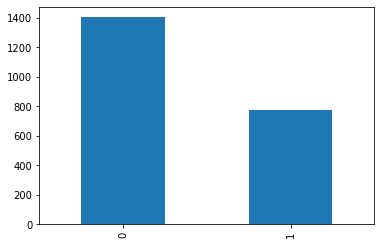

In [24]:
# examine the class imbalance
pd.value_counts(y_converted).plot.bar()

In [25]:
# SMOTE (Synthetic Minority Oversampling TEchnique) consists of synthesizing elements for the minority class
# based on those that already exist. It works randomly picingk a point from the minority class and computing
# the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

import imblearn
from imblearn.over_sampling import SMOTE
'''
def plot_2d_space(x, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            x[y == l, 0],
            x[y == l, 1],
            c = c, label = l, marker = m
        )
    plt.title(label)
    plt.legend(loc = 'upper right')
    plt.show()
'''

smote = SMOTE(sampling_strategy = 'minority')
x_sm, y_sm = smote.fit_sample(x_df, y_converted)

#plot_2d_space(x_sm, y_sm, 'SMOTE over-sampling')



<AxesSubplot:>

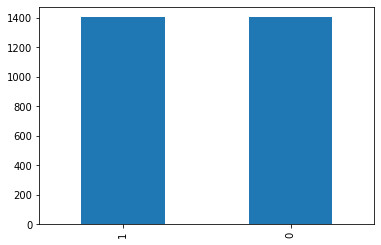

In [27]:
# examine 
pd.value_counts(y_sm).plot.bar()

In [38]:
len(y_sm)

2806

In [57]:
len(x_sm)

2806

In [58]:
x_sm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2806 entries, 0 to 2805
Data columns (total 35 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   FIPS                           2806 non-null   int64  
 1   MaxPrecipitation               2806 non-null   int64  
 2   WindSwathRadii                 2806 non-null   int64  
 3   CountyOverlap                  2806 non-null   float64
 4   VALUE_1                        2806 non-null   float64
 5   VALUE_2                        2806 non-null   float64
 6   VALUE_3                        2806 non-null   float64
 7   VALUE_4                        2806 non-null   float64
 8   VALUE_5                        2806 non-null   float64
 9   VALUE_7                        2806 non-null   float64
 10  Stormsurge_Area                2806 non-null   float64
 11  SOCIAL                         2806 non-null   float64
 12  INFRASTRUCTURE                 2806 non-null   f

In [56]:
# concatonate the target labels (y_sm) and the feature set (x_sm):
y_df = pd.DataFrame(y_sm)
y_df.rename(columns={0:'Declared'}, inplace=True)
y_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2806 entries, 0 to 2805
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Declared  2806 non-null   int64
dtypes: int64(1)
memory usage: 22.0 KB


In [60]:
concat_df = pd.concat([y_df, x_sm], axis=1)
concat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2806 entries, 0 to 2805
Data columns (total 36 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Declared                       2806 non-null   int64  
 1   FIPS                           2806 non-null   int64  
 2   MaxPrecipitation               2806 non-null   int64  
 3   WindSwathRadii                 2806 non-null   int64  
 4   CountyOverlap                  2806 non-null   float64
 5   VALUE_1                        2806 non-null   float64
 6   VALUE_2                        2806 non-null   float64
 7   VALUE_3                        2806 non-null   float64
 8   VALUE_4                        2806 non-null   float64
 9   VALUE_5                        2806 non-null   float64
 10  VALUE_7                        2806 non-null   float64
 11  Stormsurge_Area                2806 non-null   float64
 12  SOCIAL                         2806 non-null   f

In [ ]:
# Use a utility from sklearn to split and shuffle our dataset:
train_df, test_df = train_test_split(concat_df, test_size=0.2)
train_df, val_df = train_test_split(train_df, test_size=0.2)

# Form np arrays of labels and features:
train_labels = np.array(train_df.pop('Class'))
bool_train_labels = train_labels != 0
val_labels = np.array(val_df.pop('Class'))
test_labels = np.array(test_df.pop('Class'))

train_features = np.array(train_df)
val_features = np.array(val_df)
test_features = np.array(test_df)
